# **Importing Libraries**

In [953]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from pandas.plotting import scatter_matrix

# **Getting The Data**

**NVIDIA Stock (NASDAQ)**

In [954]:
NVIDIA = pd.read_csv('NVDA.csv')
NVIDIA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-21,164.750000,170.080002,164.070007,165.660004,165.523193,48308900
1,2022-06-22,162.259995,166.619995,161.800003,163.600006,163.464890,43713500
2,2022-06-23,165.190002,165.850006,158.529999,162.250000,162.116013,46368000
3,2022-06-24,165.000000,171.399994,163.100006,171.259995,171.118561,47215300
4,2022-06-27,173.119995,173.300003,166.259995,168.690002,168.550690,42796800


**Apple Stock (NASDAQ)**


In [955]:
Apple = pd.read_csv('AAPL.csv')
Apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-21,133.419998,137.059998,133.320007,135.869995,135.063507,81000500
1,2022-06-22,134.789993,137.759995,133.910004,135.350006,134.546600,73409200
2,2022-06-23,136.820007,138.589996,135.630005,138.270004,137.449249,72433800
3,2022-06-24,139.899994,141.910004,139.770004,141.660004,140.819122,89116800
4,2022-06-27,142.699997,143.490005,140.970001,141.660004,140.819122,70207900


**Amazon Stock (NASDAQ)**

In [956]:
Amazon = pd.read_csv('AMZN.csv')
Amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-21,108.199997,111.629997,103.559998,108.680000,108.680000,70901200
1,2022-06-22,107.430000,112.129997,107.019997,108.949997,108.949997,60040100
2,2022-06-23,110.389999,113.000000,107.930000,112.440002,112.440002,64345300
3,2022-06-24,112.379997,116.709999,111.430000,116.459999,116.459999,69867600
4,2022-06-27,117.089996,117.980003,112.699997,113.220001,113.220001,62133200


**Intel Stock (NASDAQ)**

In [957]:
Intel = pd.read_csv('INTC.csv')
Intel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-21,37.360001,38.029999,37.330002,37.730000,36.262974,34004900
1,2022-06-22,37.330002,37.770000,37.220001,37.380001,35.926579,32571000
2,2022-06-23,37.610001,37.619999,36.910000,37.410000,35.955414,30163000
3,2022-06-24,37.849998,38.639999,37.740002,38.610001,37.108757,38159900
4,2022-06-27,38.869999,39.060001,38.470001,38.630001,37.127979,29585300


**Microsoft Stock (NASDAQ)**

In [958]:
Microsoft = pd.read_csv('MSFT.csv')
Microsoft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-21,250.259995,254.750000,249.509995,253.740005,251.310776,29928300
1,2022-06-22,251.889999,257.170013,250.369995,253.130005,250.706619,25939900
2,2022-06-23,255.570007,259.369995,253.630005,258.859985,256.381775,25861400
3,2022-06-24,261.809998,267.980011,261.720001,267.700012,265.137146,33923200
4,2022-06-27,268.209991,268.299988,263.279999,264.890015,262.354034,24615100


# **Visualizing The Data**

**Plot the volume of stock traded each day**

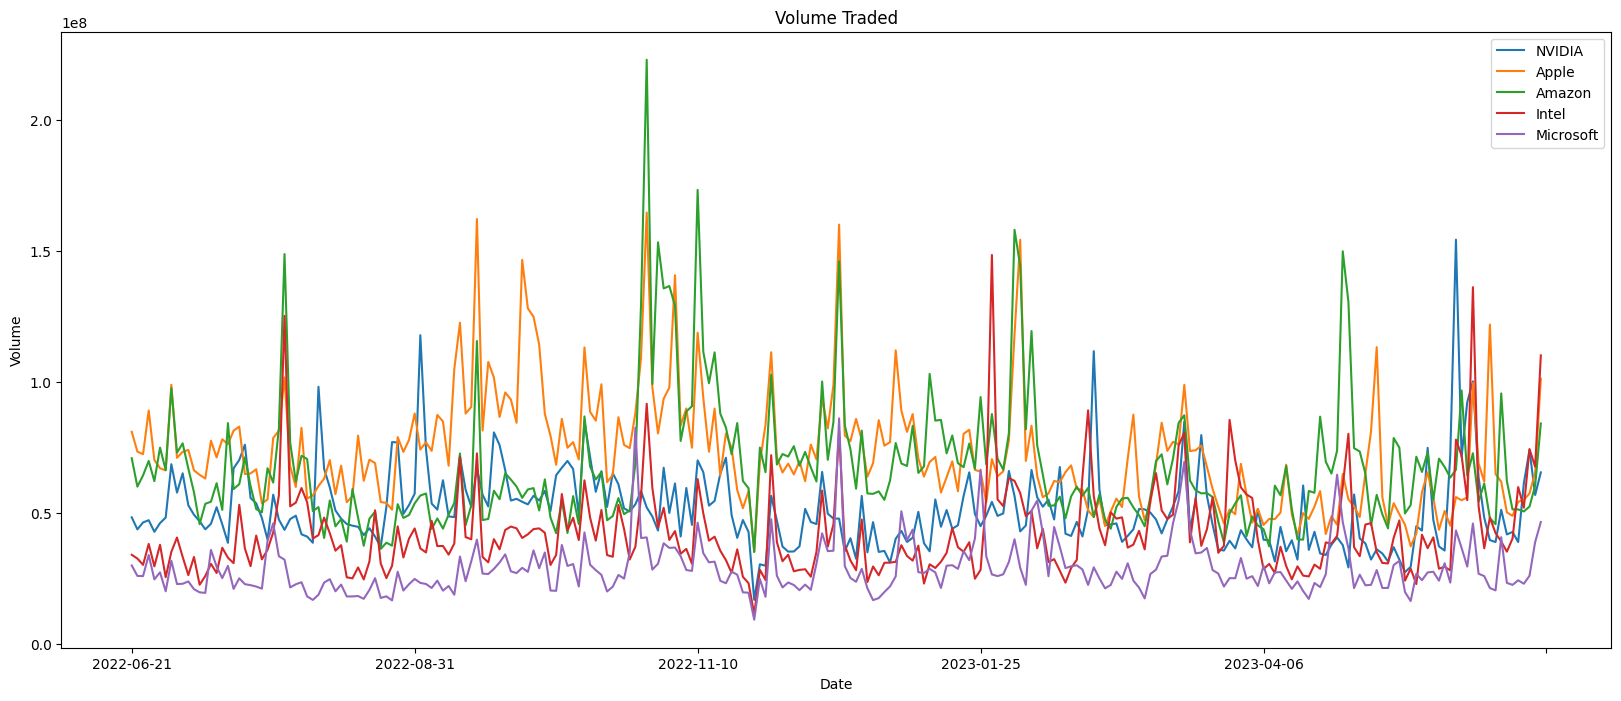

In [959]:
NVIDIA.plot(label = 'NVIDIA', figsize = (20,8), title= 'Volume Traded', x = 'Date', y = 'Volume')
Apple['Volume'].plot(label = 'Apple')
Amazon['Volume'].plot(label = 'Amazon')
Intel['Volume'].plot(label = 'Intel')
Microsoft['Volume'].plot(label = 'Microsoft')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

Based on the volume legend, it looks like Amazon had a big spike around October 2022.
What is the date of that event? And what happened at that day?

In [960]:
# Get the index of that day
Amazon['Volume'].idxmax()

91

In [961]:
# Get the date of that index
print(Amazon['Date'].loc[Amazon.index[91]])

2022-10-28


What happened 10/28/2022:
https://www.cnbc.com/2022/10/28/amazon-stock-tumbles-after-downbeat-sales-forecast.html

**Plot the open price of stock each day**

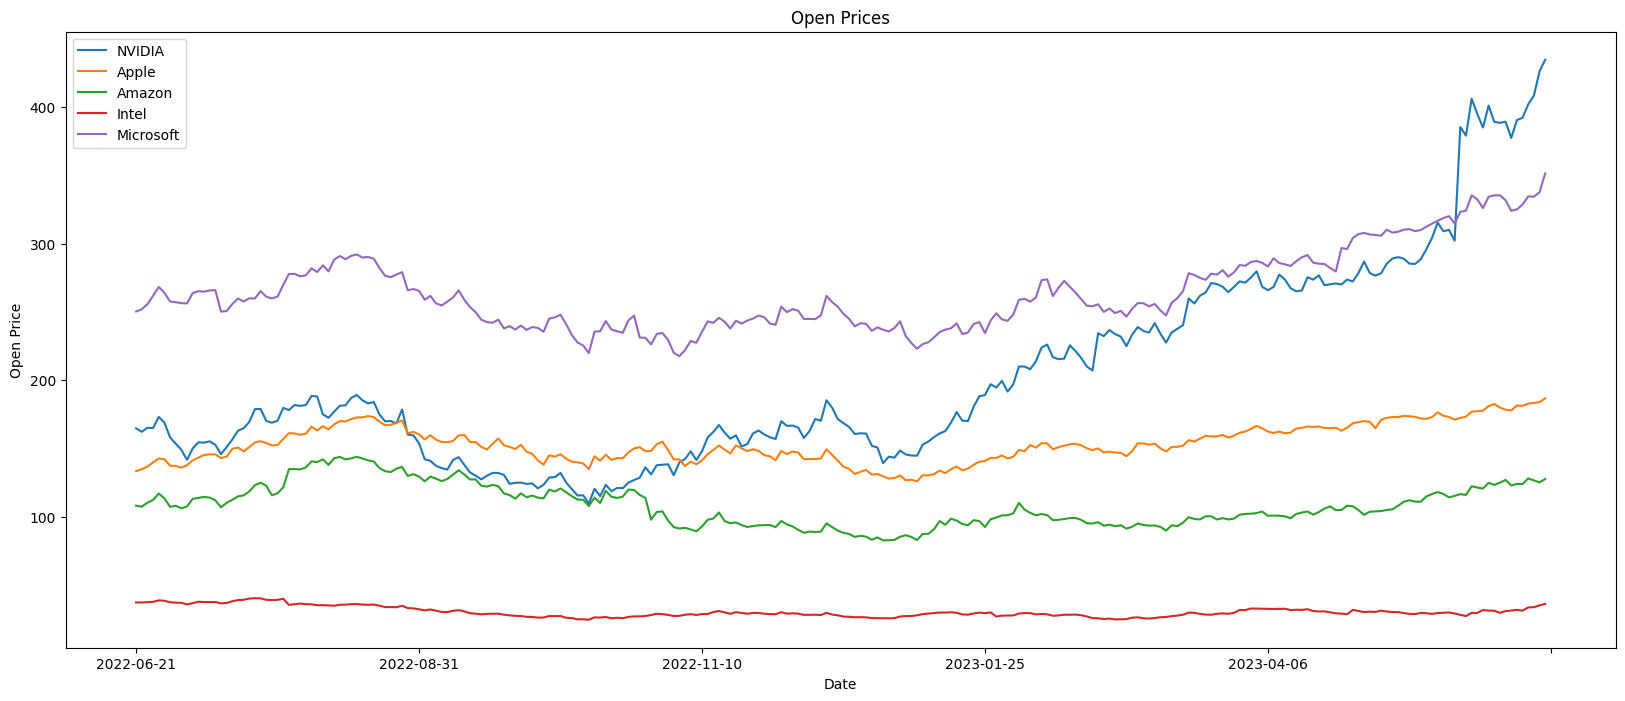

In [962]:
NVIDIA.plot(label = 'NVIDIA', figsize = (20,8), title = 'Open Prices', x = 'Date', y = 'Open')
Apple['Open'].plot(label = 'Apple')
Amazon['Open'].plot(label = 'Amazon')
Intel['Open'].plot(label = 'Intel')
Microsoft['Open'].plot(label = 'Microsoft')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

Based on the open time series visualization, it looks like Microsoft is more valuable that the other four companies. However, the stock price is not enough to determine that. We need the total market cap to better understand this. Unfortuanatly, the data available does not include that information. But, we can determine the total money traded each day through multiplying the volume by the open price.

**Generate the Total Traded each day**

In [963]:
# Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.
NVIDIA['Total Traded'] = NVIDIA['Volume'] * NVIDIA['Open']
Apple['Total Traded'] = Apple['Volume'] * Apple['Open']
Amazon['Total Traded'] = Amazon['Volume'] * Amazon['Open']
Intel['Total Traded'] = Intel['Volume'] * Intel['Open']
Microsoft['Total Traded'] = Microsoft['Volume'] * Microsoft['Open']

**Plot the total traded each day**

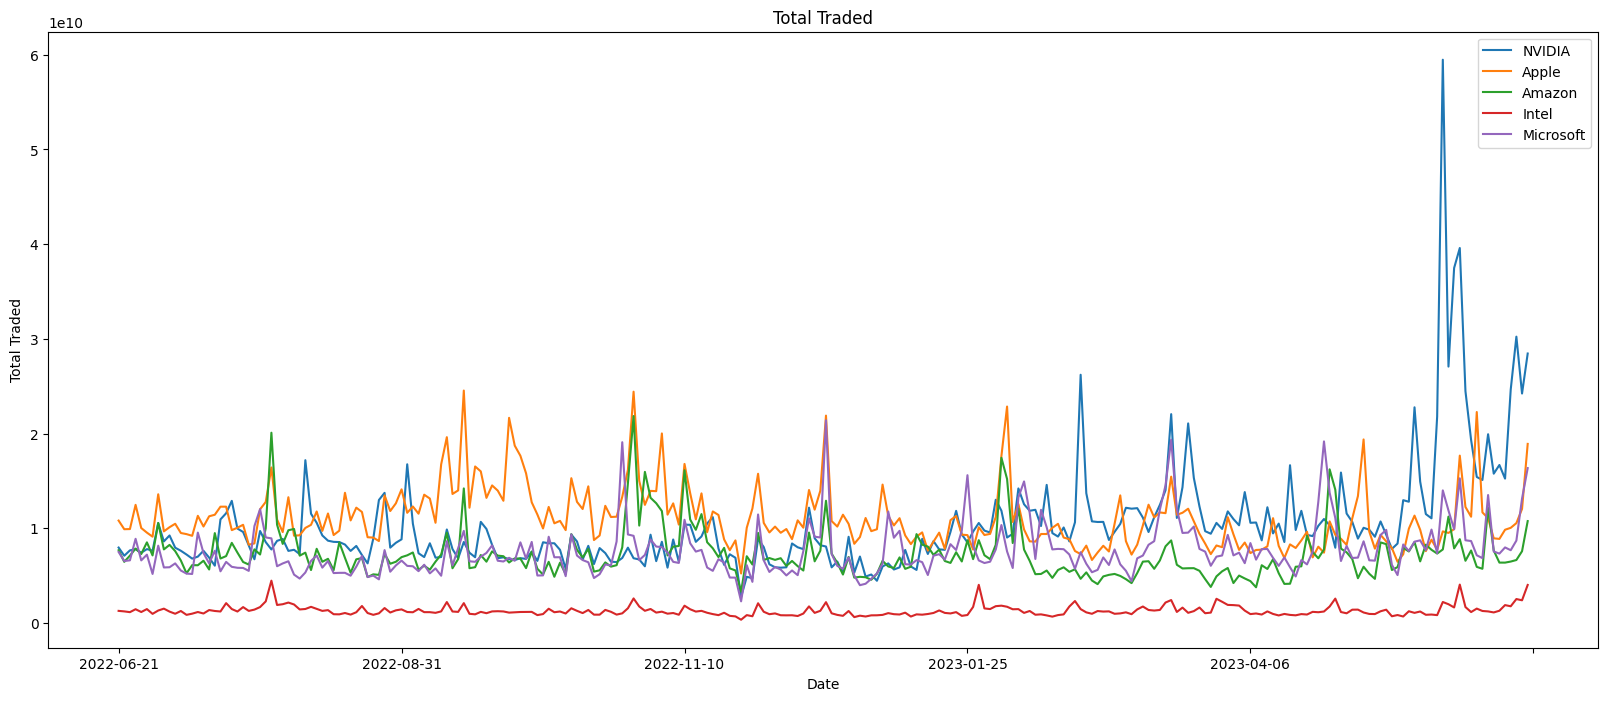

In [964]:
NVIDIA.plot(label = 'NVIDIA', figsize = (20,8), title = 'Total Traded', x = 'Date', y = 'Total Traded')
Apple['Total Traded'].plot(label = 'Apple')
Amazon['Total Traded'].plot(label = 'Amazon')
Intel['Total Traded'].plot(label = 'Intel')
Microsoft['Total Traded'].plot(label = 'Microsoft')
plt.xlabel('Date')
plt.ylabel('Total Traded')
plt.legend()

Based on the total traded legend, it looks like a huge amount of money traded for NVIDIA around May 2022. What happened at that day?

In [965]:
# Get the index of that day
NVIDIA['Total Traded'].idxmax()

234

In [966]:
# Get the date of that index
print(NVIDIA['Date'].loc[NVIDIA.index[234]])

2023-05-25


What happened 05/25/2023: https://www.fool.com/investing/2023/05/25/why-nvidia-stock-skyrocketed-higher-on-thursday/

**Plot MA (Moving Average), MA50, and MA200 for NVIDIA**

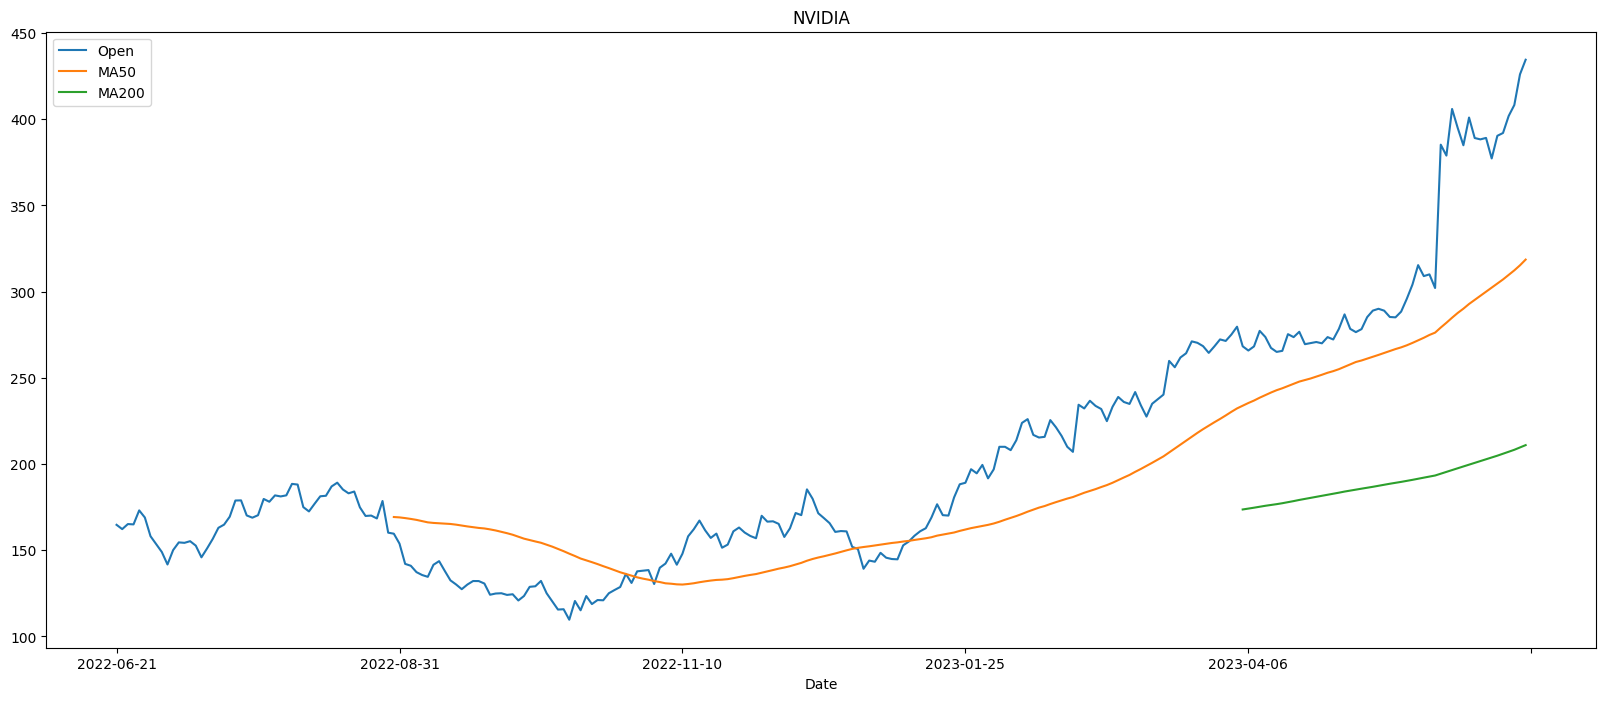

In [967]:
NVIDIA['MA50'] = NVIDIA['Open'].rolling(50).mean()
NVIDIA['MA200'] = NVIDIA['Open'].rolling(200).mean()
NVIDIA.plot(label = 'Open', figsize = (20,8), title = 'NVIDIA', x = 'Date', y = 'Open')
NVIDIA['MA50'].plot(label = 'MA50')
NVIDIA['MA200'].plot(label = 'MA200')
plt.legend()

**Plot MA (Moving Average), MA50, and MA200 for Apple**

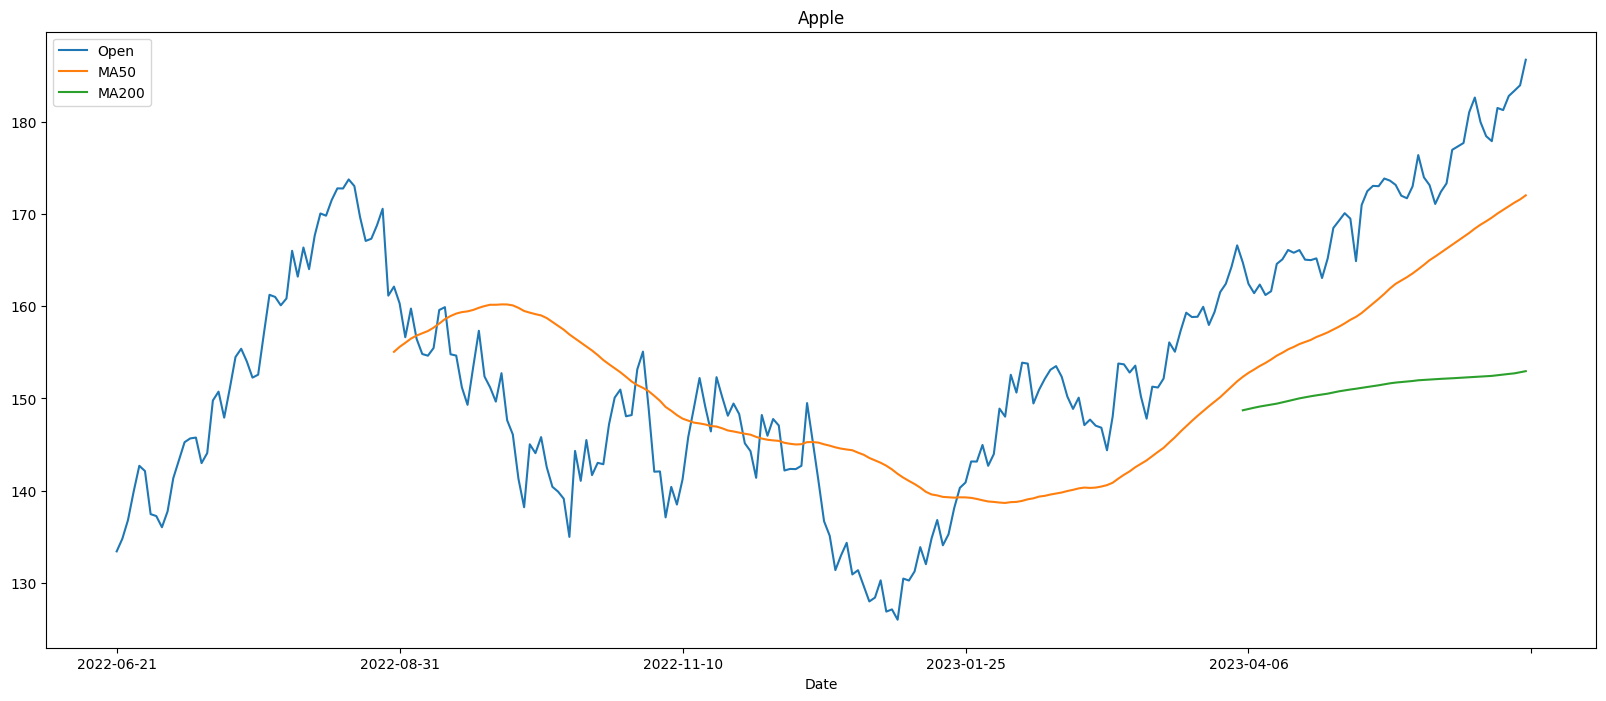

In [968]:
Apple['MA50'] = Apple['Open'].rolling(50).mean()
Apple['MA200'] = Apple['Open'].rolling(200).mean()
Apple.plot(label = 'Open', figsize = (20,8), title = 'Apple', x = 'Date', y = 'Open')
Apple['MA50'].plot(label = 'MA50')
Apple['MA200'].plot(label = 'MA200')
plt.legend()

**Plot MA (Moving Average), MA50, and MA200 for Amazon**

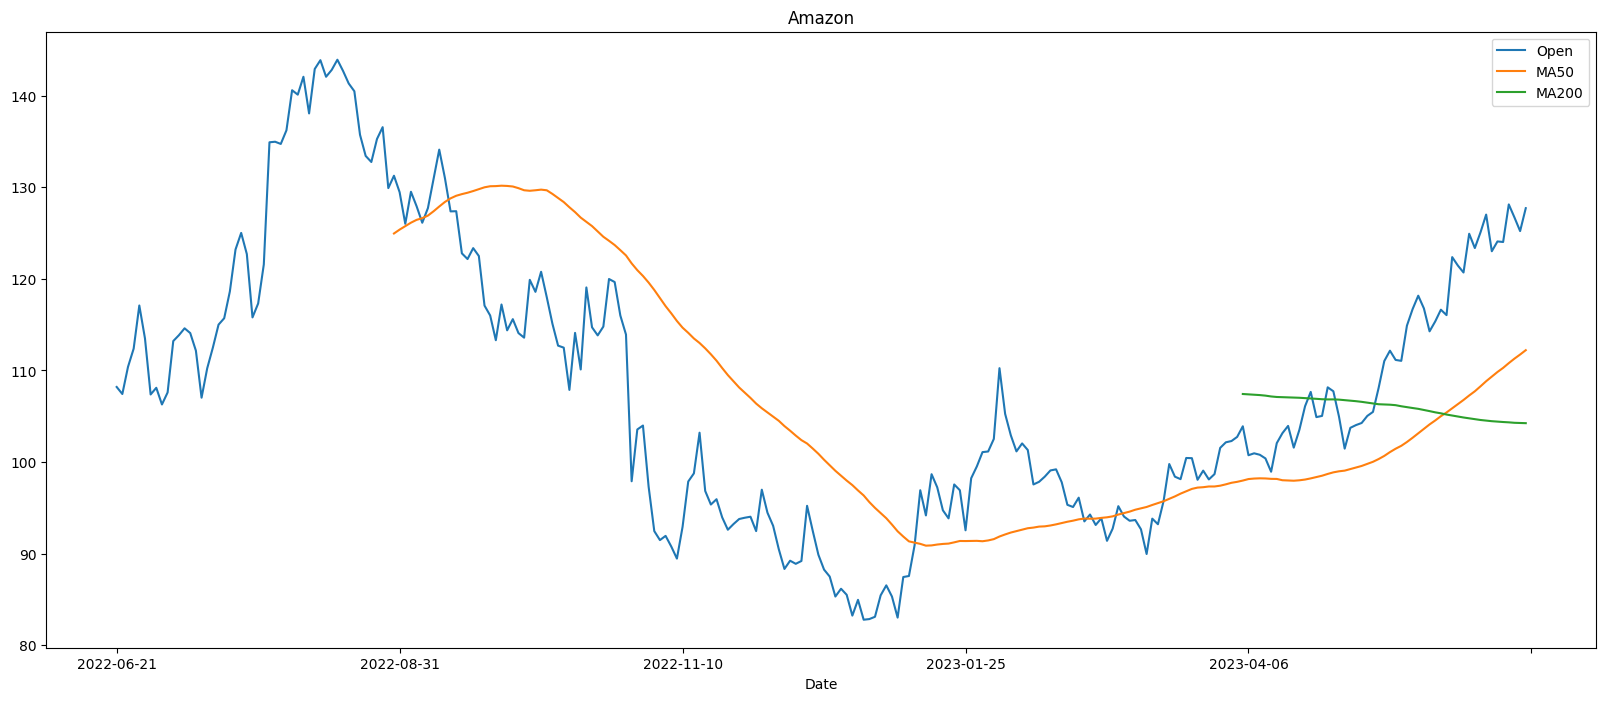

In [969]:
Amazon['MA50'] = Amazon['Open'].rolling(50).mean()
Amazon['MA200'] = Amazon['Open'].rolling(200).mean()
Amazon.plot(label = 'Open', figsize = (20,8), title = 'Amazon', x = 'Date', y = 'Open')
Amazon['MA50'].plot(label = 'MA50')
Amazon['MA200'].plot(label = 'MA200')
plt.legend()

**Plot MA (Moving Average), MA50, and MA200 for Intel**

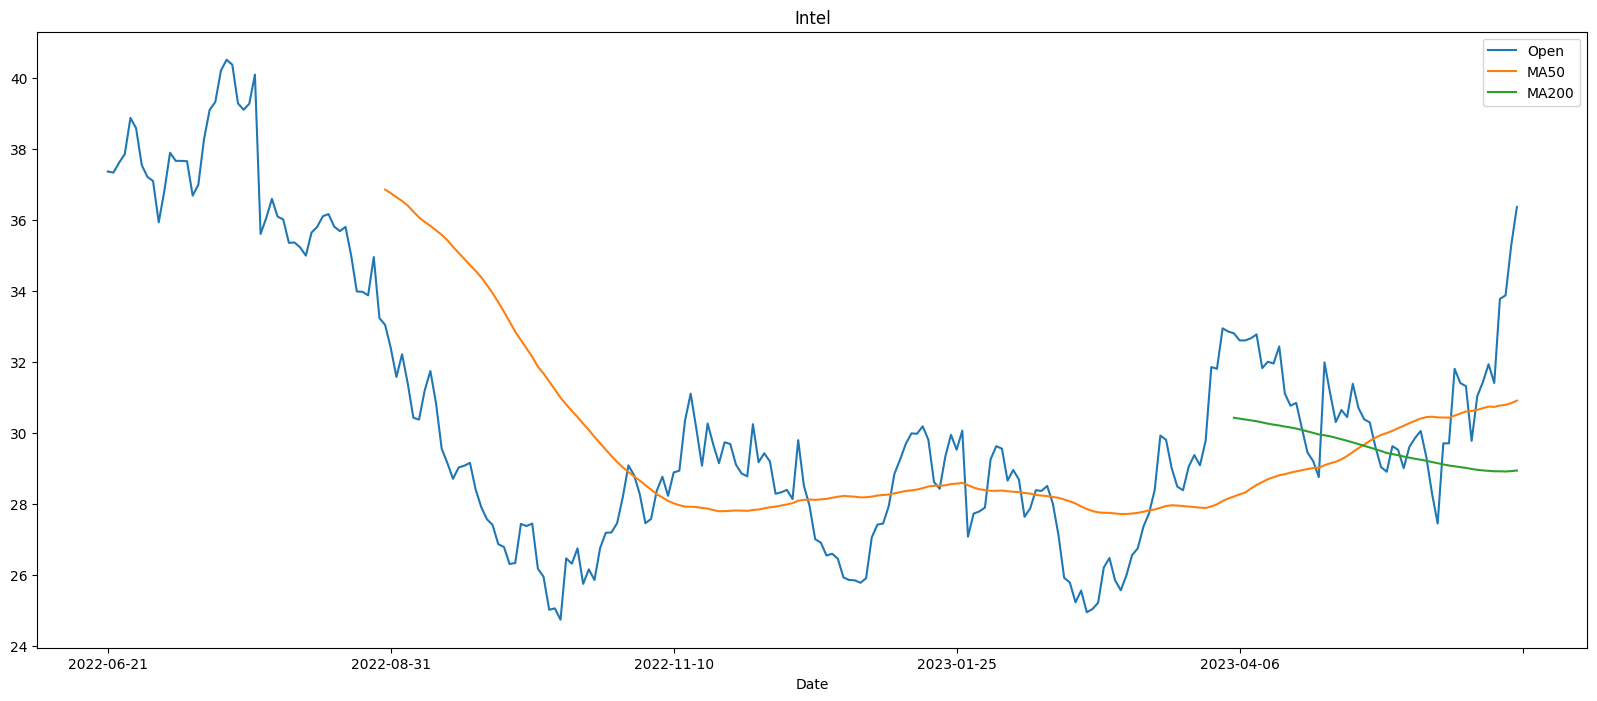

In [970]:
Intel['MA50'] = Intel['Open'].rolling(50).mean()
Intel['MA200'] = Intel['Open'].rolling(200).mean()
Intel.plot(label = 'Open', figsize = (20,8), title = 'Intel', x = 'Date', y = 'Open')
Intel['MA50'].plot(label = 'MA50')
Intel['MA200'].plot(label = 'MA200')
plt.legend()

**Plot MA (Moving Average), MA50, and MA200 for Microsoft**

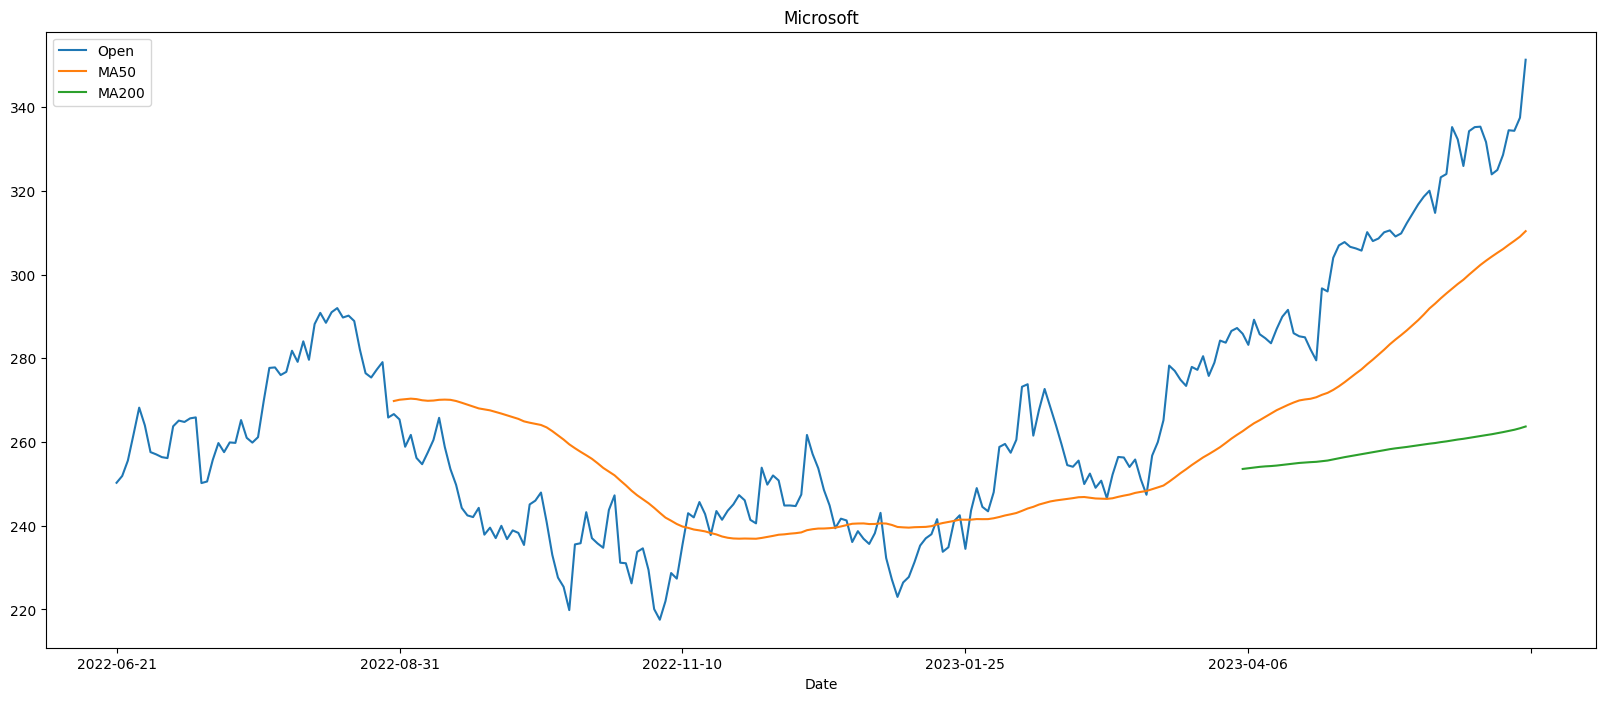

In [971]:
Microsoft['MA50'] = Microsoft['Open'].rolling(50).mean()
Microsoft['MA200'] = Microsoft['Open'].rolling(200).mean()
Microsoft.plot(label = 'Open', figsize = (20,8), title = 'Microsoft', x = 'Date', y = 'Open')
Microsoft['MA50'].plot(label = 'MA50')
Microsoft['MA200'].plot(label = 'MA200')
plt.legend()

Let's see if there is a relationaship between those stocks, after all, they are all tech companies. We determine this using a scatter matrix plot

**Plot the scatter matrix**

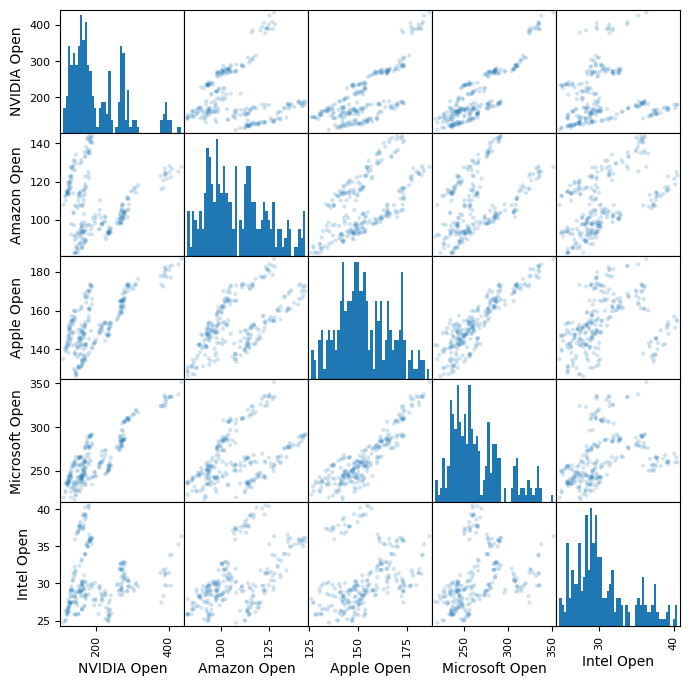

In [972]:
techComp = pd.concat([NVIDIA['Open'], Amazon['Open'], Apple['Open'], Microsoft['Open'], Intel['Open']], axis = 1)
techComp.columns = ['NVIDIA Open', 'Amazon Open', 'Apple Open', 'Microsoft Open', 'Intel Open']
# You can use a semi-colon to remove the axes print outs
scatter_matrix(techComp, figsize = (8,8), alpha = 0.2, hist_kwds = {'bins':50});

# Financial Analysis

**Daily Percentage Change**

Calculating Daily Percentage Change using this formula: r_t = (p_t / p_(t-1)) - 1

NVIDIA

In [973]:
NVIDIA['returns'] = (NVIDIA['Close'] / NVIDIA['Close'].shift(1)) - 1
NVIDIA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
0,2022-06-21,164.750000,170.080002,164.070007,165.660004,165.523193,48308900,7.958891e+09,NaN,NaN,NaN
1,2022-06-22,162.259995,166.619995,161.800003,163.600006,163.464890,43713500,7.092952e+09,NaN,NaN,-0.012435
2,2022-06-23,165.190002,165.850006,158.529999,162.250000,162.116013,46368000,7.659530e+09,NaN,NaN,-0.008252
3,2022-06-24,165.000000,171.399994,163.100006,171.259995,171.118561,47215300,7.790524e+09,NaN,NaN,0.055532
4,2022-06-27,173.119995,173.300003,166.259995,168.690002,168.550690,42796800,7.408982e+09,NaN,NaN,-0.015006


Apple

In [974]:
Apple['returns'] = (Apple['Close'] / Apple['Close'].shift(1)) - 1
Apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
0,2022-06-21,133.419998,137.059998,133.320007,135.869995,135.063507,81000500,1.080709e+10,NaN,NaN,NaN
1,2022-06-22,134.789993,137.759995,133.910004,135.350006,134.546600,73409200,9.894826e+09,NaN,NaN,-0.003827
2,2022-06-23,136.820007,138.589996,135.630005,138.270004,137.449249,72433800,9.910393e+09,NaN,NaN,0.021574
3,2022-06-24,139.899994,141.910004,139.770004,141.660004,140.819122,89116800,1.246744e+10,NaN,NaN,0.024517
4,2022-06-27,142.699997,143.490005,140.970001,141.660004,140.819122,70207900,1.001867e+10,NaN,NaN,0.000000


Amazon

In [975]:
Amazon['returns'] = (Amazon['Close'] / Amazon['Close'].shift(1)) - 1
Amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
0,2022-06-21,108.199997,111.629997,103.559998,108.680000,108.680000,70901200,7.671510e+09,NaN,NaN,NaN
1,2022-06-22,107.430000,112.129997,107.019997,108.949997,108.949997,60040100,6.450108e+09,NaN,NaN,0.002484
2,2022-06-23,110.389999,113.000000,107.930000,112.440002,112.440002,64345300,7.103078e+09,NaN,NaN,0.032033
3,2022-06-24,112.379997,116.709999,111.430000,116.459999,116.459999,69867600,7.851721e+09,NaN,NaN,0.035752
4,2022-06-27,117.089996,117.980003,112.699997,113.220001,113.220001,62133200,7.275176e+09,NaN,NaN,-0.027821


Intel

In [976]:
Intel['returns'] = (Intel['Close'] / Intel['Close'].shift(1)) - 1
Intel.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
0,2022-06-21,37.360001,38.029999,37.330002,37.730000,36.262974,34004900,1.270423e+09,NaN,NaN,NaN
1,2022-06-22,37.330002,37.770000,37.220001,37.380001,35.926579,32571000,1.215875e+09,NaN,NaN,-0.009276
2,2022-06-23,37.610001,37.619999,36.910000,37.410000,35.955414,30163000,1.134430e+09,NaN,NaN,0.000803
3,2022-06-24,37.849998,38.639999,37.740002,38.610001,37.108757,38159900,1.444352e+09,NaN,NaN,0.032077
4,2022-06-27,38.869999,39.060001,38.470001,38.630001,37.127979,29585300,1.149981e+09,NaN,NaN,0.000518


Microsoft

In [977]:
Microsoft['returns'] = (Microsoft['Close'] / Microsoft['Close'].shift(1)) - 1
Microsoft.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
0,2022-06-21,250.259995,254.750000,249.509995,253.740005,251.310776,29928300,7.489856e+09,NaN,NaN,NaN
1,2022-06-22,251.889999,257.170013,250.369995,253.130005,250.706619,25939900,6.534001e+09,NaN,NaN,-0.002404
2,2022-06-23,255.570007,259.369995,253.630005,258.859985,256.381775,25861400,6.609398e+09,NaN,NaN,0.022637
3,2022-06-24,261.809998,267.980011,261.720001,267.700012,265.137146,33923200,8.881433e+09,NaN,NaN,0.034150
4,2022-06-27,268.209991,268.299988,263.279999,264.890015,262.354034,24615100,6.602016e+09,NaN,NaN,-0.010497


Plot histograms of the companies returns separately

NVIDIA

<Axes: >

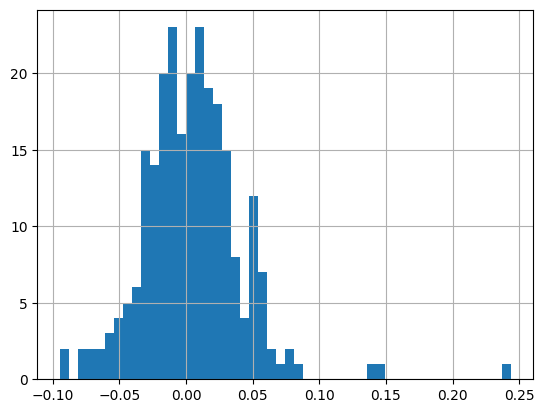

In [978]:
NVIDIA['returns'].hist(bins = 50)

Apple

<Axes: >

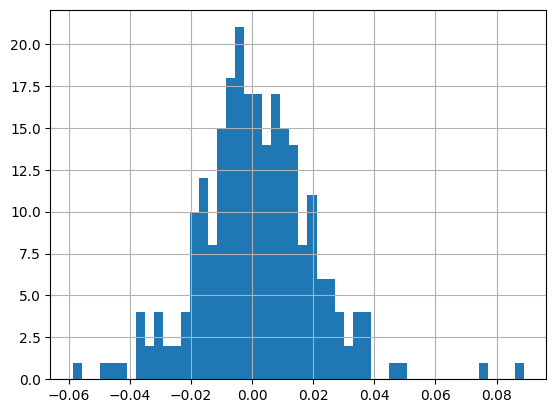

In [979]:
Apple['returns'].hist(bins = 50)

Amazon

<Axes: >

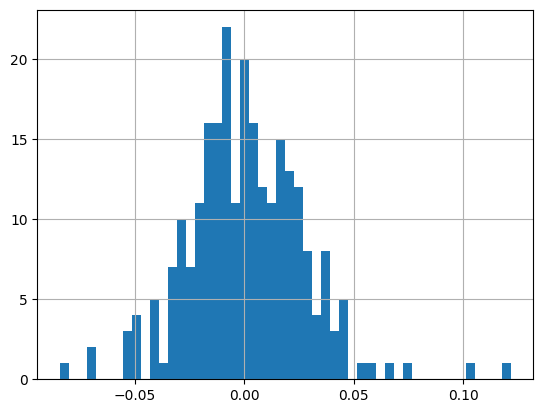

In [980]:
Amazon['returns'].hist(bins = 50)

Intel

<Axes: >

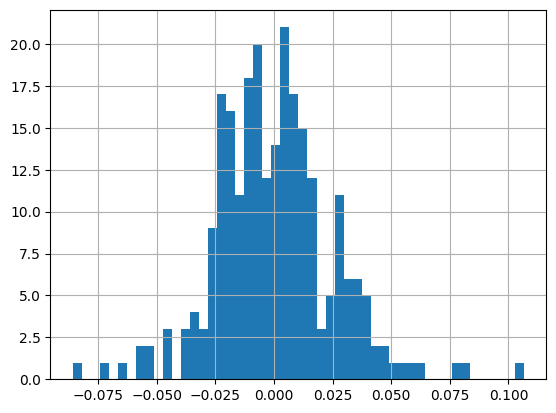

In [981]:
Intel['returns'].hist(bins = 50)

Microsoft

<Axes: >

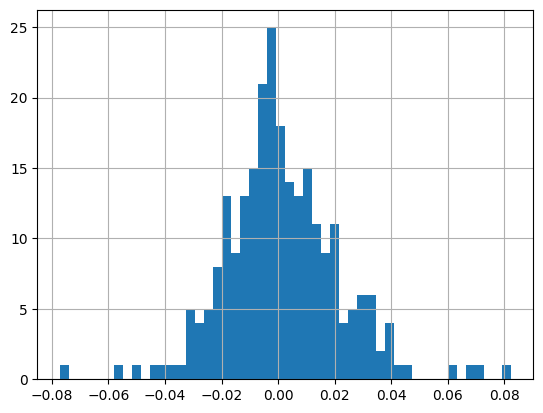

In [982]:
Microsoft['returns'].hist(bins = 50)

Plot histograms of the companies returns stack on each other to compare volatility (volatility is judged by the variance in the daily returns)

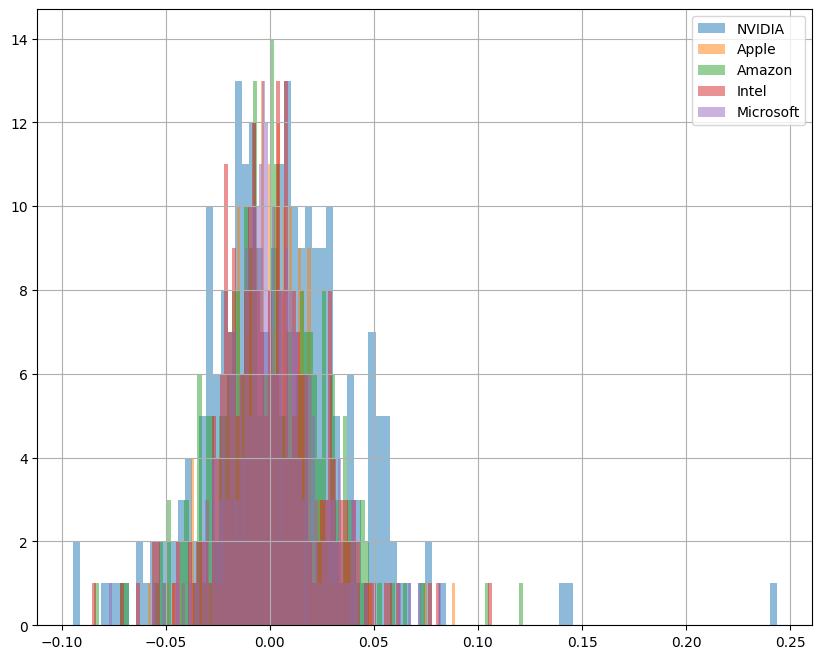

In [983]:
NVIDIA['returns'].hist(bins = 100, label = 'NVIDIA', figsize = (10,8), alpha = 0.5)
Apple['returns'].hist(bins = 100, label = 'Apple', alpha = 0.5)
Amazon['returns'].hist(bins = 100, label = 'Amazon', alpha = 0.5)
Intel['returns'].hist(bins = 100, label = 'Intel', alpha = 0.5)
Microsoft['returns'].hist(bins = 100, label = 'Microsoft', alpha = 0.5)
plt.legend()

Plot KDE instead of histograms to get another view point. Which stock has the widest plot?

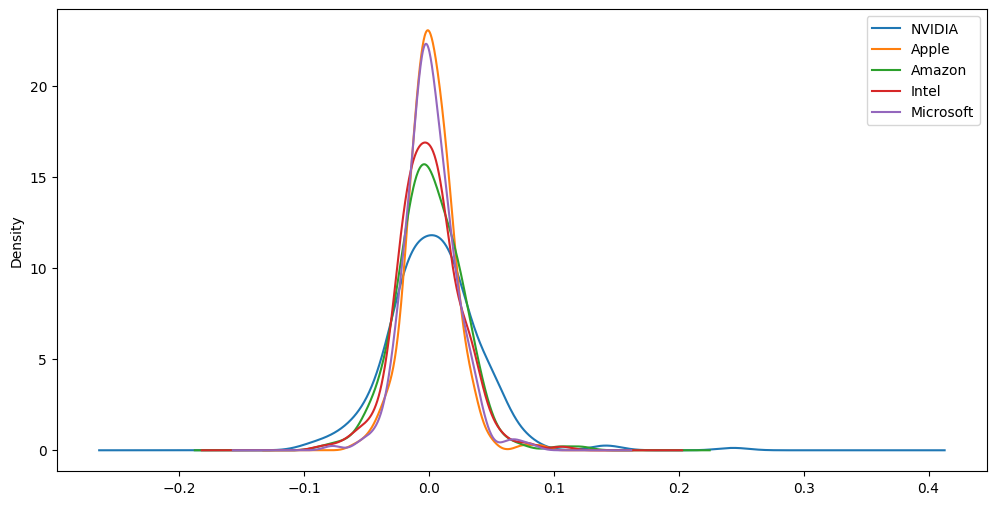

In [984]:
NVIDIA['returns'].plot(kind = 'kde', label = 'NVIDIA', figsize = (12,6))
Apple['returns'].plot(kind = 'kde', label = 'Apple')
Amazon['returns'].plot(kind = 'kde', label = 'Amazon')
Intel['returns'].plot(kind = 'kde', label = 'Intel')
Microsoft['returns'].plot(kind = 'kde', label = 'Microsoft')
plt.legend()

Create box plots comparing the returns

<Axes: >

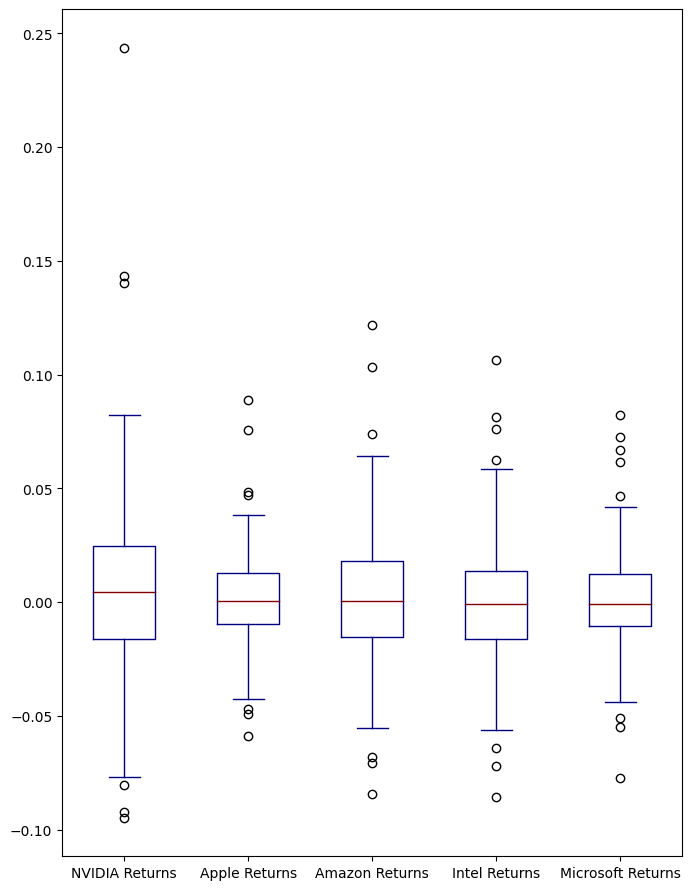

In [985]:
box_df = pd.concat([NVIDIA['returns'], Apple['returns'], Amazon['returns'], Intel['returns'], Microsoft['returns']], axis = 1)
box_df.columns = ['NVIDIA Returns', 'Apple Returns', 'Amazon Returns', 'Intel Returns', 'Microsoft Returns']
box_df.plot(kind = 'box', figsize = (8,11), colormap = 'jet')

**Comparing Stocks Daily Returns**

Plot the scatter matrix

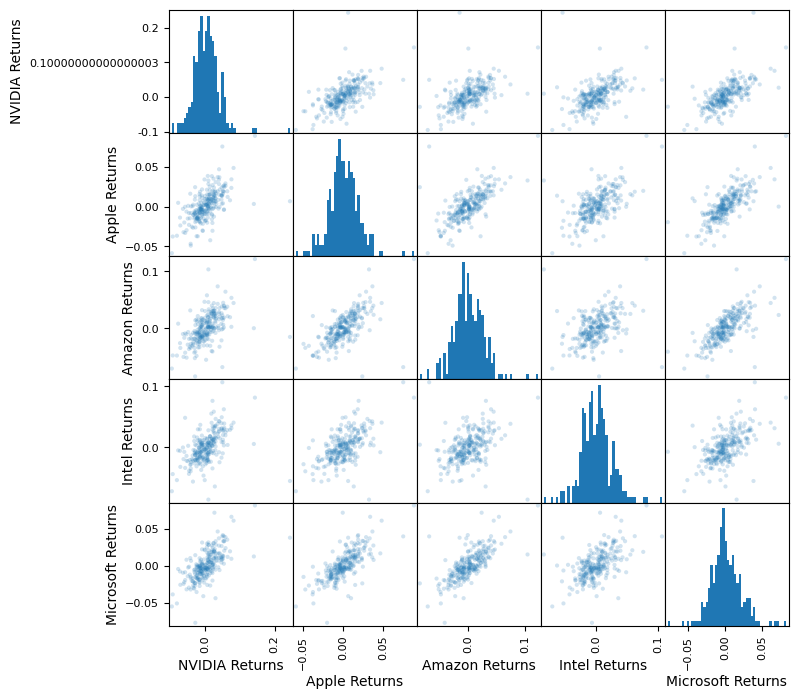

In [986]:
scatter_matrix(box_df, figsize = (8,8), alpha = 0.2, hist_kwds = {'bins':50});

It looks like Intel and Microsoft may have some sort of relationship. Let's plot them against each other in a scatter plot for a better visualization.

<Axes: xlabel='Intel Returns', ylabel='Microsoft Returns'>

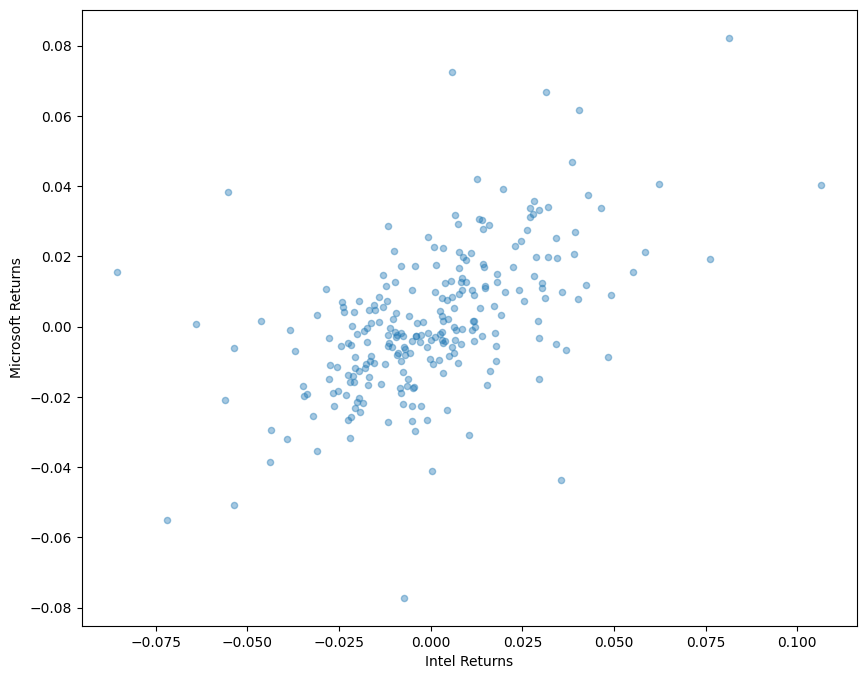

In [987]:
box_df.plot(kind = 'scatter', x = 'Intel Returns', y = 'Microsoft Returns', alpha = 0.4, figsize = (10,8))

**Cumulative Daily Returns**

1. Daily Return: Daily return is the profit or loss made by the stock compared to the previous day. We can find it by dividing today price by the previous day price. A value above one indicates profit and below one indicates loss. We can also convert it to percentage to convey the information better (if percentage above zero then profit otherwise loss). Daily return can be useful. However, it does not provide the inverstor with an immediate insight of the gains he made up to date especially if the stock is very volatile.

2. Cumulative Return: Cumulative return is computed relative to the day the investment was made. If it is above one then it is profit otherwise it is loss. The cumulative daily return formula is: i_i = (1 + r_t) * i_(t - 1)

Compute NVIDIA cumulative daily return

In [988]:
# Using Pandas cumprod() method to compute the cumulative daily return
NVIDIA['Cumulative Return'] = (1 + NVIDIA['returns']).cumprod()
NVIDIA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
0,2022-06-21,164.750000,170.080002,164.070007,165.660004,165.523193,48308900,7.958891e+09,NaN,NaN,NaN,NaN
1,2022-06-22,162.259995,166.619995,161.800003,163.600006,163.464890,43713500,7.092952e+09,NaN,NaN,-0.012435,0.987565
2,2022-06-23,165.190002,165.850006,158.529999,162.250000,162.116013,46368000,7.659530e+09,NaN,NaN,-0.008252,0.979416
3,2022-06-24,165.000000,171.399994,163.100006,171.259995,171.118561,47215300,7.790524e+09,NaN,NaN,0.055532,1.033804
4,2022-06-27,173.119995,173.300003,166.259995,168.690002,168.550690,42796800,7.408982e+09,NaN,NaN,-0.015006,1.018290


Compute Apple cumulative daily return

In [989]:
# Using Pandas cumprod() method to compute the cumulative daily return
Apple['Cumulative Return'] = (1 + Apple['returns']).cumprod()
Apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
0,2022-06-21,133.419998,137.059998,133.320007,135.869995,135.063507,81000500,1.080709e+10,NaN,NaN,NaN,NaN
1,2022-06-22,134.789993,137.759995,133.910004,135.350006,134.546600,73409200,9.894826e+09,NaN,NaN,-0.003827,0.996173
2,2022-06-23,136.820007,138.589996,135.630005,138.270004,137.449249,72433800,9.910393e+09,NaN,NaN,0.021574,1.017664
3,2022-06-24,139.899994,141.910004,139.770004,141.660004,140.819122,89116800,1.246744e+10,NaN,NaN,0.024517,1.042614
4,2022-06-27,142.699997,143.490005,140.970001,141.660004,140.819122,70207900,1.001867e+10,NaN,NaN,0.000000,1.042614


Compute Amazon cumulative daily return

In [990]:
# Using Pandas cumprod() method to compute the cumulative daily return
Amazon['Cumulative Return'] = (1 + Amazon['returns']).cumprod()
Amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
0,2022-06-21,108.199997,111.629997,103.559998,108.680000,108.680000,70901200,7.671510e+09,NaN,NaN,NaN,NaN
1,2022-06-22,107.430000,112.129997,107.019997,108.949997,108.949997,60040100,6.450108e+09,NaN,NaN,0.002484,1.002484
2,2022-06-23,110.389999,113.000000,107.930000,112.440002,112.440002,64345300,7.103078e+09,NaN,NaN,0.032033,1.034597
3,2022-06-24,112.379997,116.709999,111.430000,116.459999,116.459999,69867600,7.851721e+09,NaN,NaN,0.035752,1.071586
4,2022-06-27,117.089996,117.980003,112.699997,113.220001,113.220001,62133200,7.275176e+09,NaN,NaN,-0.027821,1.041774


Compute Intel cumulative daily return

In [991]:
# Using Pandas cumprod() method to compute the cumulative daily return
Intel['Cumulative Return'] = (1 + Intel['returns']).cumprod()
Intel.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
0,2022-06-21,37.360001,38.029999,37.330002,37.730000,36.262974,34004900,1.270423e+09,NaN,NaN,NaN,NaN
1,2022-06-22,37.330002,37.770000,37.220001,37.380001,35.926579,32571000,1.215875e+09,NaN,NaN,-0.009276,0.990724
2,2022-06-23,37.610001,37.619999,36.910000,37.410000,35.955414,30163000,1.134430e+09,NaN,NaN,0.000803,0.991519
3,2022-06-24,37.849998,38.639999,37.740002,38.610001,37.108757,38159900,1.444352e+09,NaN,NaN,0.032077,1.023324
4,2022-06-27,38.869999,39.060001,38.470001,38.630001,37.127979,29585300,1.149981e+09,NaN,NaN,0.000518,1.023854


Compute Microsoft cumulative daily return

In [992]:
# Using Pandas cumprod() method to compute the cumulative daily return
Microsoft['Cumulative Return'] = (1 + Microsoft['returns']).cumprod()
Microsoft.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
0,2022-06-21,250.259995,254.750000,249.509995,253.740005,251.310776,29928300,7.489856e+09,NaN,NaN,NaN,NaN
1,2022-06-22,251.889999,257.170013,250.369995,253.130005,250.706619,25939900,6.534001e+09,NaN,NaN,-0.002404,0.997596
2,2022-06-23,255.570007,259.369995,253.630005,258.859985,256.381775,25861400,6.609398e+09,NaN,NaN,0.022637,1.020178
3,2022-06-24,261.809998,267.980011,261.720001,267.700012,265.137146,33923200,8.881433e+09,NaN,NaN,0.034150,1.055017
4,2022-06-27,268.209991,268.299988,263.279999,264.890015,262.354034,24615100,6.602016e+09,NaN,NaN,-0.010497,1.043943


Plot the cumulative daily return column against the time series index. Which stock has the highest return return for a 1$ investment?

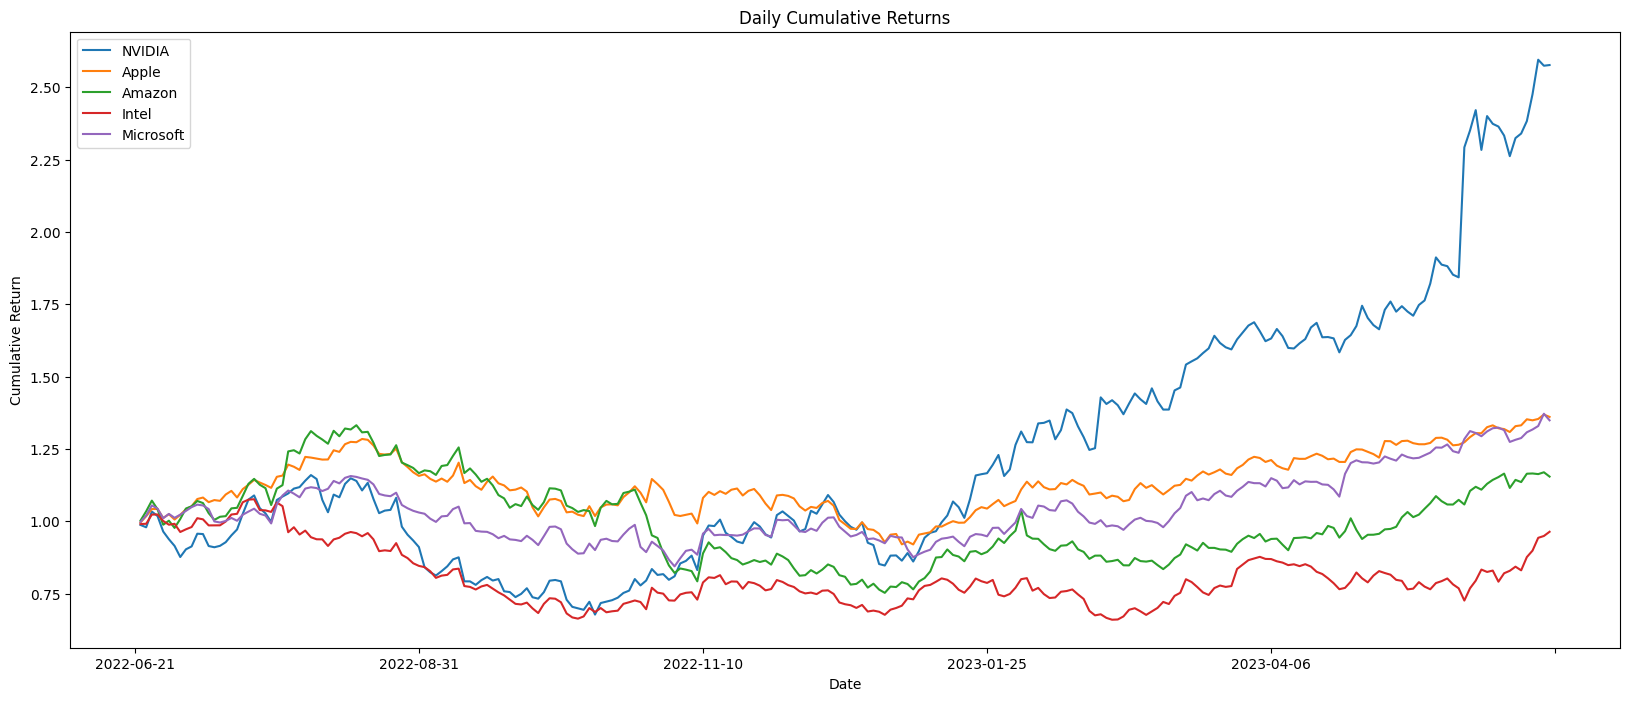

In [993]:
NVIDIA.plot(label = 'NVIDIA', figsize = (20,8), title = 'Daily Cumulative Returns', x = 'Date', y = 'Cumulative Return')
Apple['Cumulative Return'].plot(label = 'Apple')
Amazon['Cumulative Return'].plot(label = 'Amazon')
Intel['Cumulative Return'].plot(label = 'Intel')
Microsoft['Cumulative Return'].plot(label = 'Microsoft')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()

# Thank you